In [1]:
5.22e+3

5220.0

In [8]:
29.4526/105

0.2805009523809524

In [4]:
0.0568*105, 0.5190*68

(5.964, 35.292)

In [6]:
((10.2795-5.964)**2 + (14.701600000000001-35.292)**2)**0.5

21.037778219431825

In [5]:
0.0412*105,0.3028*68

(4.326, 20.590400000000002)

In [3]:
5.2642447e-01,4.6947429e-01

(0.52642447, 0.46947429)

In [ ]:
# Deactivate distracting warnings
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

import warnings
warnings.filterwarnings("ignore")

from datatools.preprocess import display_data_summary, load_event_data, load_position_data, load_data, extract_match_id, load_team_sheets
from datatools.visualization import plot_event_count, plot_kde, plot_goal_positions

# Define the path to the dataset
# path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'DFL')
path = "/data/MHL/dfl-spoho/raw"

10분정도 걸립니다.

In [5]:
# Display Data Summary. Note that executing this code can take several minutes due the complexity of the parsing routines.
display_data_summary(path)

📂 Dataset path: /data/MHL/dfl-spoho/raw


OSError: Error reading file 'None': failed to load external entity "None"

In [2]:
match_ids = [extract_match_id(filename) for filename in os.listdir(path)]
match_ids

['DFL-MAT-J03WMX',
 'DFL-MAT-J03WOY',
 'DFL-MAT-J03WR9',
 'DFL-MAT-J03WPY',
 'DFL-MAT-J03WOH',
 'DFL-MAT-J03WN1',
 'DFL-MAT-J03WQQ']

In [3]:
# Define paths and filenames. Note that executing this code can take several minutes due of the large data the KDE-plot has to process.
match_path = os.path.join(path, match_ids[0])

file_name_pos = next((filename for filename in os.listdir(match_path) if "positions_raw" in filename), None)
file_name_info = next((filename for filename in os.listdir(match_path) if "matchinformation" in filename), None)
file_name_event = next((filename for filename in os.listdir(match_path) if "events_raw" in filename), None)

# Load data
xy_objects, events, pitch = load_data(match_path, file_name_pos, file_name_info, file_name_event)
all_events = load_event_data(match_path)
print(type(all_events))  # ✅ all_events의 데이터 타입 확인
print(all_events.head())  # ✅ 데이터 미리보기 (비어 있는지 확인)
print("Columns in all_events:", all_events.columns)

<class 'pandas.core.frame.DataFrame'>
                 eID  gameclock             tID             pID  outcome  \
0  KickOff_Play_Pass      0.000  DFL-CLU-00000G  DFL-OBJ-0027G6      NaN   
1          Play_Pass      2.829  DFL-CLU-00000G  DFL-OBJ-0027KL      NaN   
0  ThrowIn_Play_Pass     21.551  DFL-CLU-000008  DFL-OBJ-0002BO      NaN   
1       TacklingGame     22.268  DFL-CLU-000008  DFL-OBJ-J01BGM      1.0   
2    OtherBallAction     22.733  DFL-CLU-00000G  DFL-OBJ-0027KL      NaN   

                         timestamp  minute  second  \
0 2023-05-27 15:30:12.230000+02:00     0.0     0.0   
1 2023-05-27 15:30:15.059000+02:00     0.0     2.0   
0 2023-05-27 15:30:33.781000+02:00     0.0    21.0   
1 2023-05-27 15:30:34.498000+02:00     0.0    22.0   
2 2023-05-27 15:30:34.963000+02:00     0.0    22.0   

                                           qualifier  period_id  team  
0  {'TeamLeft': 'DFL-CLU-00000G', 'TeamRight': 'D...          1  Away  
1  {'SemiField': 'false', 'Player': 

In [24]:
all_events

,eID,gameclock,tID,pID,outcome,timestamp,minute,second,qualifier
0,ThrowIn_Play_Pass,21.551,DFL-CLU-000008,DFL-OBJ-0002BO,NaN,2023-05-27 15:30:33.781000+02:00,0.0,21.0,"{'Team': 'DFL-CLU-000008', 'Side': 'right', 'D..."
1,TacklingGame,22.268,DFL-CLU-000008,DFL-OBJ-J01BGM,1.0,2023-05-27 15:30:34.498000+02:00,0.0,22.0,"{'WinnerTeam': 'DFL-CLU-00000G', 'Winner': 'DF..."
2,TacklingGame,25.216,DFL-CLU-000008,DFL-OBJ-0027AX,1.0,2023-05-27 15:30:37.446000+02:00,0.0,25.0,"{'WinnerTeam': 'DFL-CLU-00000G', 'Winner': 'DF..."
3,OtherBallAction,44.291,DFL-CLU-000008,DFL-OBJ-0027B6,NaN,2023-05-27 15:30:56.521000+02:00,0.0,44.0,"{'Player': 'DFL-OBJ-0027B6', 'Team': 'DFL-CLU-..."
4,Delete,68.364,None,None,NaN,2023-05-27 15:31:20.594000+02:00,1.0,8.0,{}
...,...,...,...,...,...,...,...,...,...
416,TacklingGame,2955.490,DFL-CLU-00000G,DFL-OBJ-0002AU,1.0,2023-05-27 17:24:58.880000+02:00,49.0,15.0,"{'WinnerTeam': 'DFL-CLU-000008', 'Winner': 'DF..."
417,ThrowIn_Play_Pass,2974.233,DFL-CLU-00000G,DFL-OBJ-0027G0,NaN,2023-05-27 17:25:17.623000+02:00,49.0,34.0,"{'Team': 'DFL-CLU-00000G', 'Side': 'right', 'D..."
418,OtherBallAction,2975.441,DFL-CLU-00000G,DFL-OBJ-0000RP,NaN,2023-05-27 17:25:18.831000+02:00,49.0,35.0,"{'Player': 'DFL-OBJ-0000RP', 'Team': 'DFL-CLU-..."
419,OtherBallAction,2992.377,DFL-CLU-00000G,DFL-OBJ-0027KL,NaN,2023-05-27 17:25:35.767000+02:00,49.0,52.0,"{'Player': 'DFL-OBJ-0027KL', 'Team': 'DFL-CLU-..."


홈, 원정, 공의 위치정보

In [25]:
xy_objects

{'firstHalf': {'Home': XY(xy=array([[-6.900e+00, -5.120e+00,        nan, ..., -5.180e+00,        nan,
                 nan],
         [-6.820e+00, -5.100e+00,        nan, ..., -5.230e+00,        nan,
                 nan],
         [-6.720e+00, -5.080e+00,        nan, ..., -5.280e+00,        nan,
                 nan],
         ...,
         [ 1.000e-02,  1.139e+01,        nan, ...,  1.003e+01,        nan,
                 nan],
         [ 0.000e+00,  1.147e+01,        nan, ...,  1.010e+01,        nan,
                 nan],
         [ 0.000e+00,  1.154e+01,        nan, ...,  1.018e+01,        nan,
                 nan]]), framerate=25, direction=None),
  'Away': XY(xy=array([[-46.73,   0.18,    nan, ...,    nan,    nan,    nan],
         [-46.71,   0.18,    nan, ...,    nan,    nan,    nan],
         [-46.68,   0.18,    nan, ...,    nan,    nan,    nan],
         ...,
         [-53.57,  -0.21,    nan, ...,    nan,    nan,    nan],
         [-53.52,  -0.26,    nan, ...,    nan,    nan,

In [26]:
xy_objects.keys(), xy_objects['firstHalf'].keys(), xy_objects['firstHalf']['Home'].xy.shape

(dict_keys(['firstHalf', 'secondHalf']),
 dict_keys(['Home', 'Away', 'Ball']),
 (70708, 40))

In [27]:
import pandas as pd

# NumPy 배열 → Pandas DataFrame 변환
df_xy = pd.DataFrame(xy_objects['firstHalf']['Home'].xy)

# 모든 행/열을 생략 없이 출력

pd.set_option("display.max_columns", None)

# DataFrame 출력
df_xy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-6.90,-5.12,NaN,NaN,-13.08,13.71,2.12,7.09,-47.37,-0.25,-17.26,-20.85,NaN,NaN,-20.16,-7.08,NaN,NaN,-0.44,15.57,NaN,NaN,NaN,NaN,-10.39,3.39,NaN,NaN,-1.40,-13.05,NaN,NaN,-18.84,4.49,NaN,NaN,-11.37,-5.18,NaN,NaN
1,-6.82,-5.10,NaN,NaN,-13.06,13.75,2.28,6.99,-47.34,-0.26,-17.23,-20.88,NaN,NaN,-20.12,-7.09,NaN,NaN,-0.37,15.57,NaN,NaN,NaN,NaN,-10.28,3.39,NaN,NaN,-1.39,-13.05,NaN,NaN,-18.79,4.49,NaN,NaN,-11.34,-5.23,NaN,NaN
2,-6.72,-5.08,NaN,NaN,-13.05,13.78,2.44,6.88,-47.30,-0.26,-17.18,-20.91,NaN,NaN,-20.09,-7.10,NaN,NaN,-0.29,15.57,NaN,NaN,NaN,NaN,-10.16,3.39,NaN,NaN,-1.39,-13.05,NaN,NaN,-18.75,4.49,NaN,NaN,-11.31,-5.28,NaN,NaN
3,-6.62,-5.05,NaN,NaN,-13.03,13.82,2.61,6.78,-47.26,-0.26,-17.15,-20.94,NaN,NaN,-20.06,-7.12,NaN,NaN,-0.21,15.57,NaN,NaN,NaN,NaN,-10.03,3.39,NaN,NaN,-1.38,-13.06,NaN,NaN,-18.70,4.48,NaN,NaN,-11.29,-5.33,NaN,NaN
4,-6.50,-5.02,NaN,NaN,-13.02,13.87,2.78,6.66,-47.22,-0.27,-17.11,-20.98,NaN,NaN,-20.02,-7.13,NaN,NaN,-0.12,15.57,NaN,NaN,NaN,NaN,-9.91,3.39,NaN,NaN,-1.37,-13.06,NaN,NaN,-18.65,4.48,NaN,NaN,-11.26,-5.38,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70703,0.02,11.24,NaN,NaN,-2.71,34.14,4.78,5.54,-48.43,-3.24,-17.94,-16.14,NaN,NaN,-21.13,-2.92,NaN,NaN,5.13,21.57,NaN,NaN,NaN,NaN,-8.95,5.23,NaN,NaN,5.45,-18.68,NaN,NaN,-14.35,17.47,NaN,NaN,-3.23,9.88,NaN,NaN
70704,0.02,11.32,NaN,NaN,-2.68,34.21,4.77,5.60,-48.48,-3.23,-17.90,-16.07,NaN,NaN,-21.13,-2.86,NaN,NaN,5.11,21.62,NaN,NaN,NaN,NaN,-8.94,5.31,NaN,NaN,5.45,-18.62,NaN,NaN,-14.32,17.52,NaN,NaN,-3.25,9.96,NaN,NaN
70705,0.01,11.39,NaN,NaN,-2.64,34.26,4.75,5.65,-48.54,-3.23,-17.88,-16.01,NaN,NaN,-21.13,-2.80,NaN,NaN,5.08,21.67,NaN,NaN,NaN,NaN,-8.92,5.38,NaN,NaN,5.44,-18.55,NaN,NaN,-14.29,17.58,NaN,NaN,-3.27,10.03,NaN,NaN
70706,0.00,11.47,NaN,NaN,-2.62,34.32,4.74,5.71,-48.58,-3.22,-17.86,-15.94,NaN,NaN,-21.13,-2.74,NaN,NaN,5.06,21.71,NaN,NaN,NaN,NaN,-8.92,5.46,NaN,NaN,5.44,-18.49,NaN,NaN,-14.25,17.64,NaN,NaN,-3.30,10.10,NaN,NaN


In [28]:
# 45분당 frame: 69424
# 1분당 frame: 1543(69424 / 45)
# 1초당 frame: 25(1543 / 60)
69424 / 45 / 60

25.712592592592593

홈, 원정 팀의 이벤트 정보

7경기 events들을 누적

예시 차트 그리기

In [31]:
xy_objects["firstHalf"]["Home"].xy[:, 22]

array([nan, nan, nan, ..., nan, nan, nan])

In [34]:
match_ids

['DFL-MAT-J03WMX',
 'DFL-MAT-J03WOY',
 'DFL-MAT-J03WR9',
 'DFL-MAT-J03WPY',
 'DFL-MAT-J03WOH',
 'DFL-MAT-J03WN1',
 'DFL-MAT-J03WQQ']

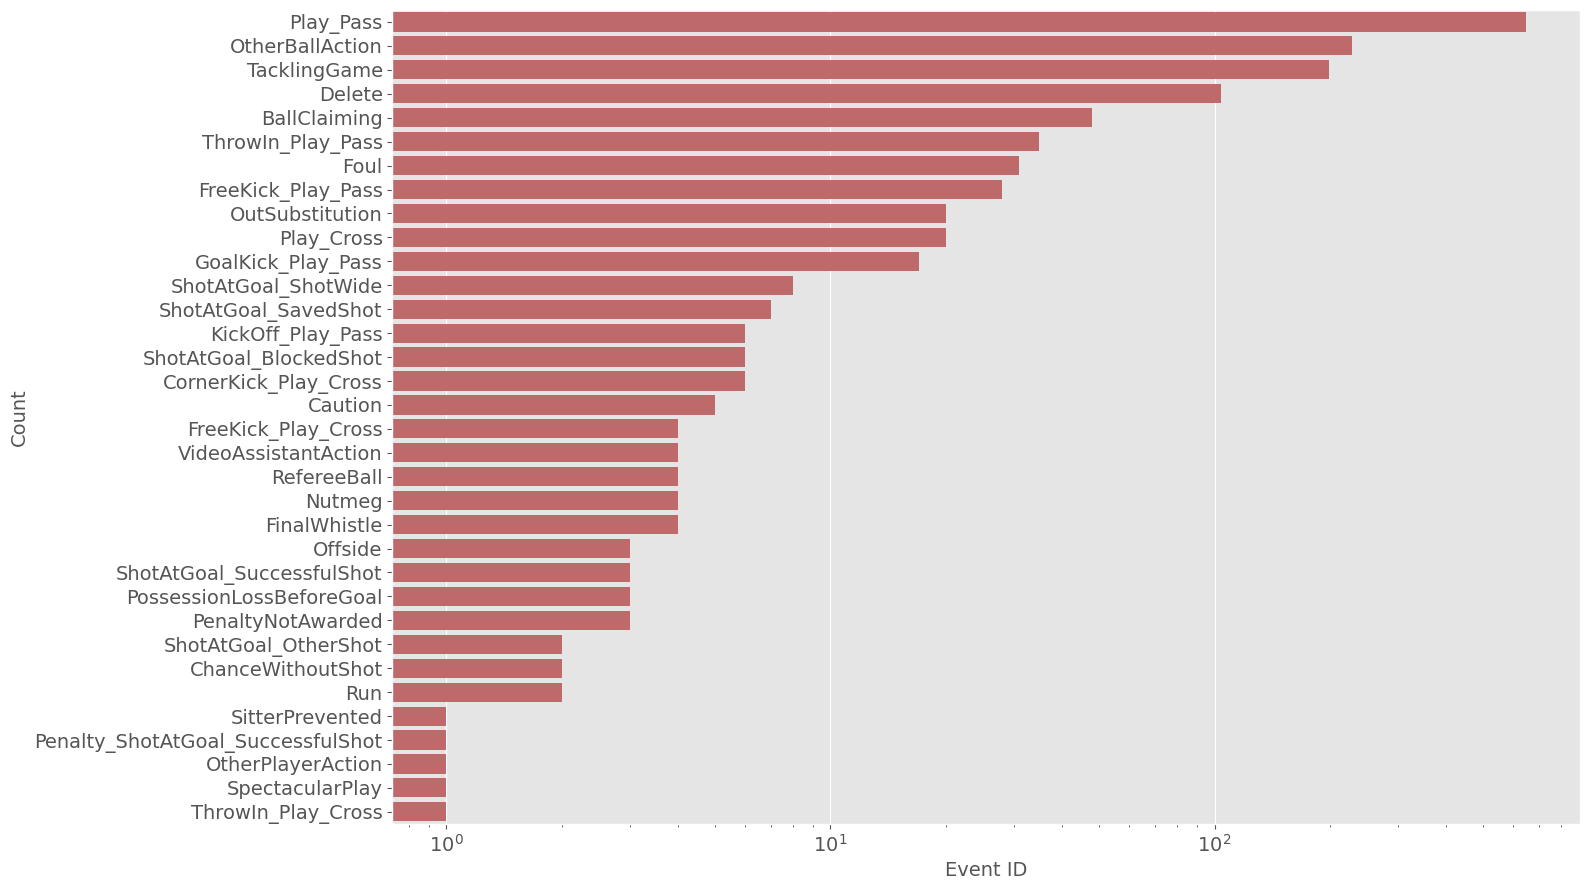

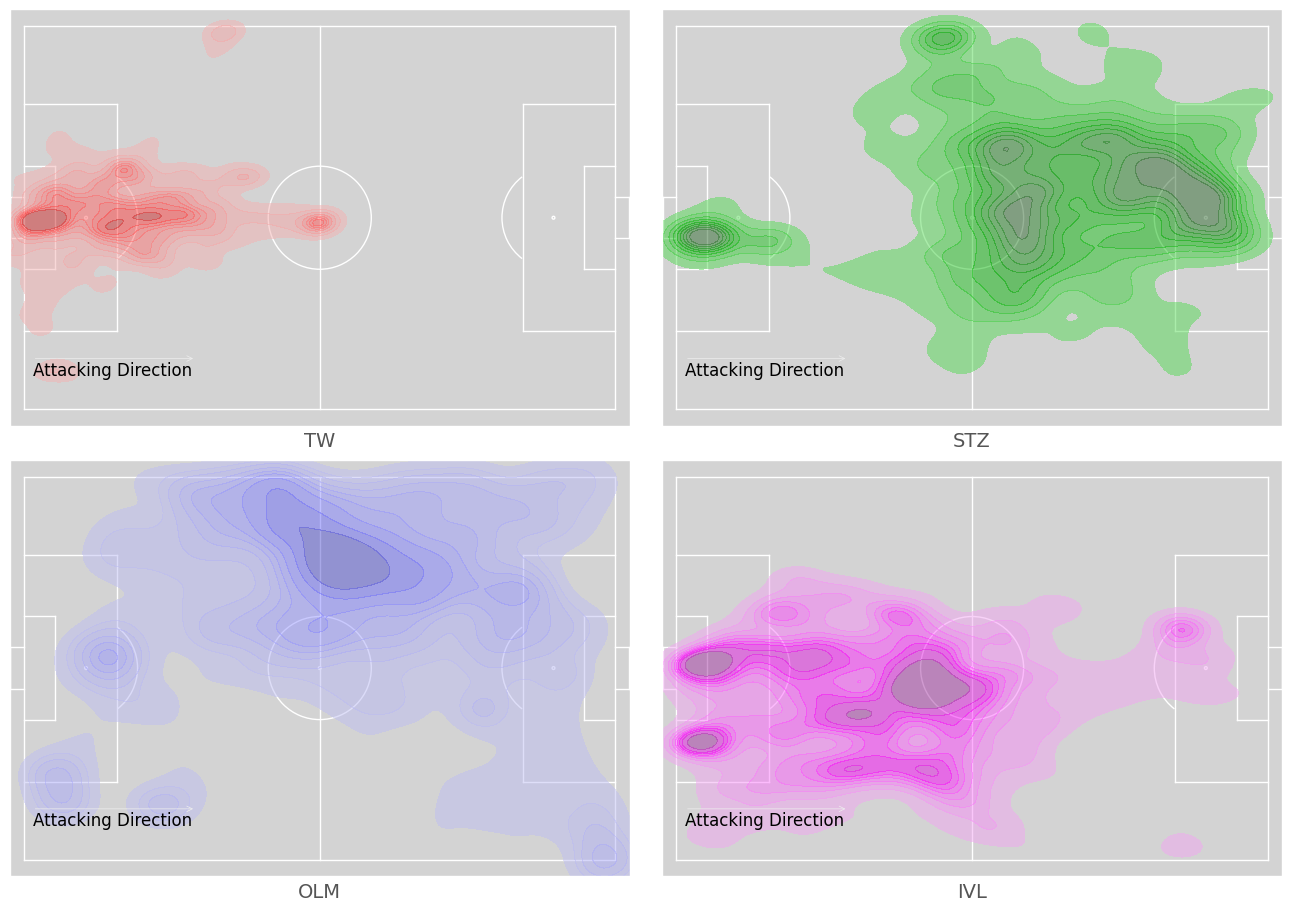

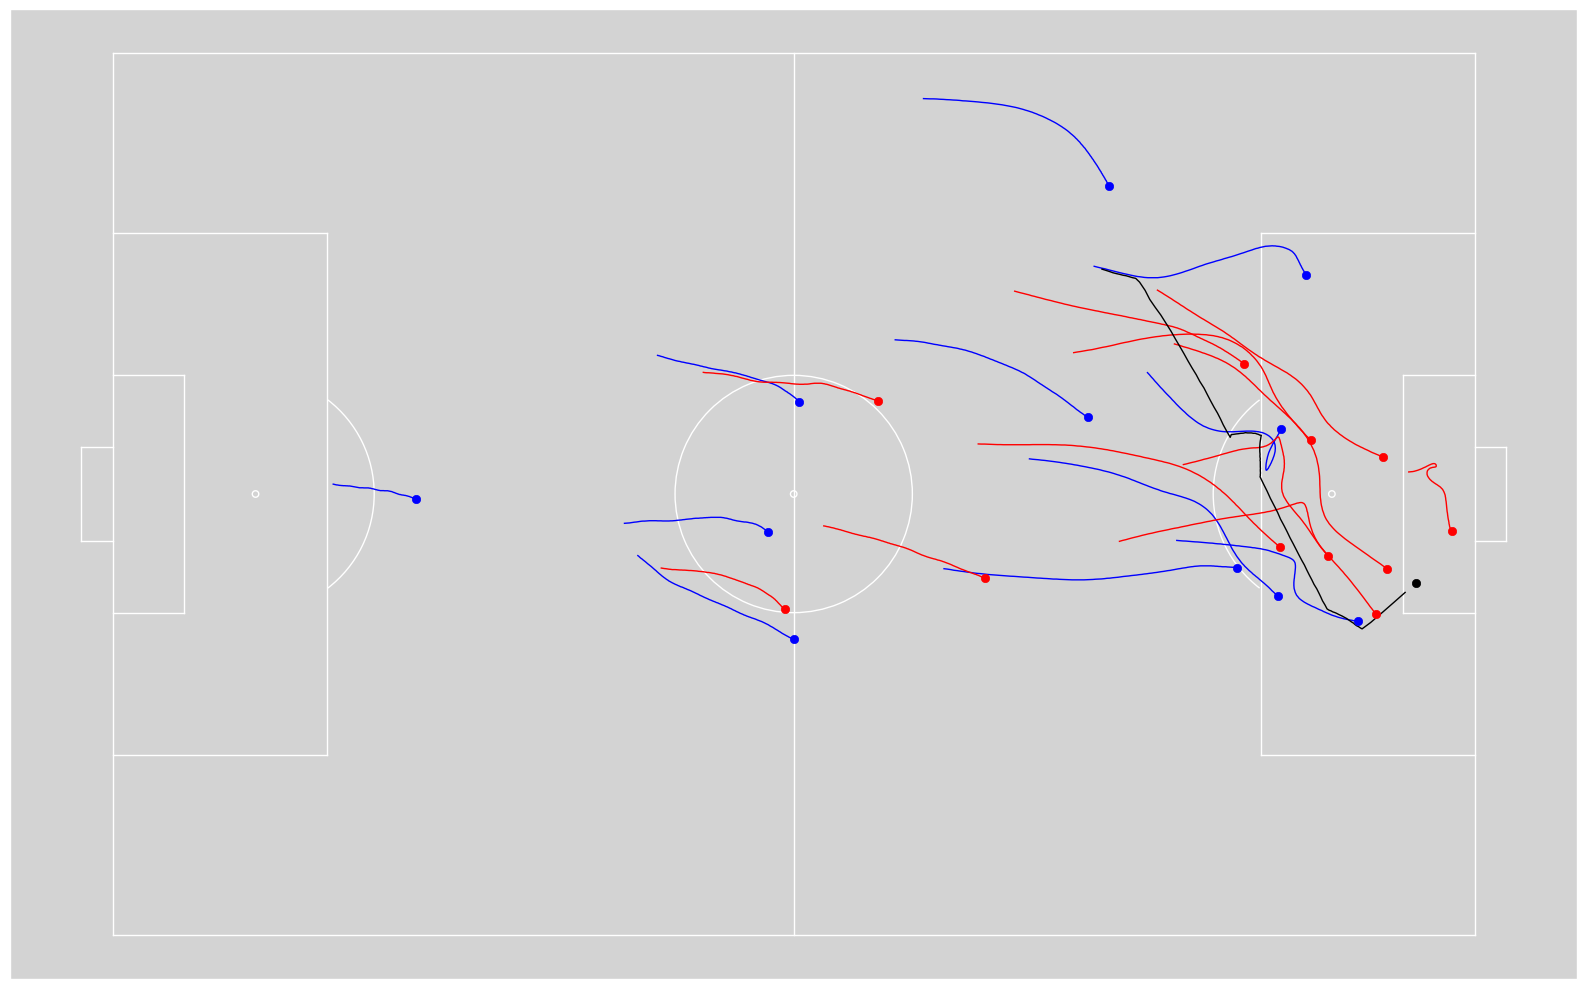

In [4]:
# Define paths and filenames. Note that executing this code can take several minutes due of the large data the KDE-plot has to process.
match_path = os.path.join(path, "DFL-MAT-J03WOH")

file_name_pos = next((filename for filename in os.listdir(match_path) if "positions_raw" in filename), None)
file_name_info = next((filename for filename in os.listdir(match_path) if "matchinformation" in filename), None)
file_name_event = next((filename for filename in os.listdir(match_path) if "events_raw" in filename), None)

# Load data
xy_objects, events, pitch = load_data(match_path, file_name_pos, file_name_info, file_name_event)
all_events = load_event_data(match_path)

# Plot Event Count
plot_event_count(all_events)

# Plot KDE
plot_kde(xy_objects, pitch)

# Plot Goal Positions
plot_goal_positions(xy_objects, events, pitch)